# <u> Machine Learning Internship Project at Bharat Intern - Iris Classification Using SVM  (Tsak 1)</u>

### <i>In this project, our objective is to conduct an in-depth exploration  of the Iris dataset. We use Two distinct classification algorithms Support Vector Machine (SVM)—to forecast The Specisies of the Iris flowers. Furthermore, we use an Artificial Neural Network (ANN) for comprehensive forecasting .</i>

# import required Libraries

In [478]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
from sklearn.svm import SVC
import tensorflow as tf
from sklearn.preprocessing import StandardScaler  
sns.set_style('darkgrid')

# Load Data

In [479]:
iris= load_iris()
x=iris.data
y=iris.target
iris = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])


In [480]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Get Information about Data Set

In [481]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


## Get Statistical Inforamtion about Data Set

In [482]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Checking Duplicate Values

In [501]:
iris.duplicated().sum()

1

## Handling duplicate Values

In [502]:
iris.drop_duplicates(inplace=True)

## Get the number of values in class labels

In [483]:
iris['target'].value_counts()

target
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64

## Get the mean of target values according to each features

In [484]:
iris.groupby(iris['target']).mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0.0,5.006,3.428,1.462,0.246
1.0,5.936,2.770,4.260,1.326
2.0,6.588,2.974,5.552,2.026


## plotting a pairplot

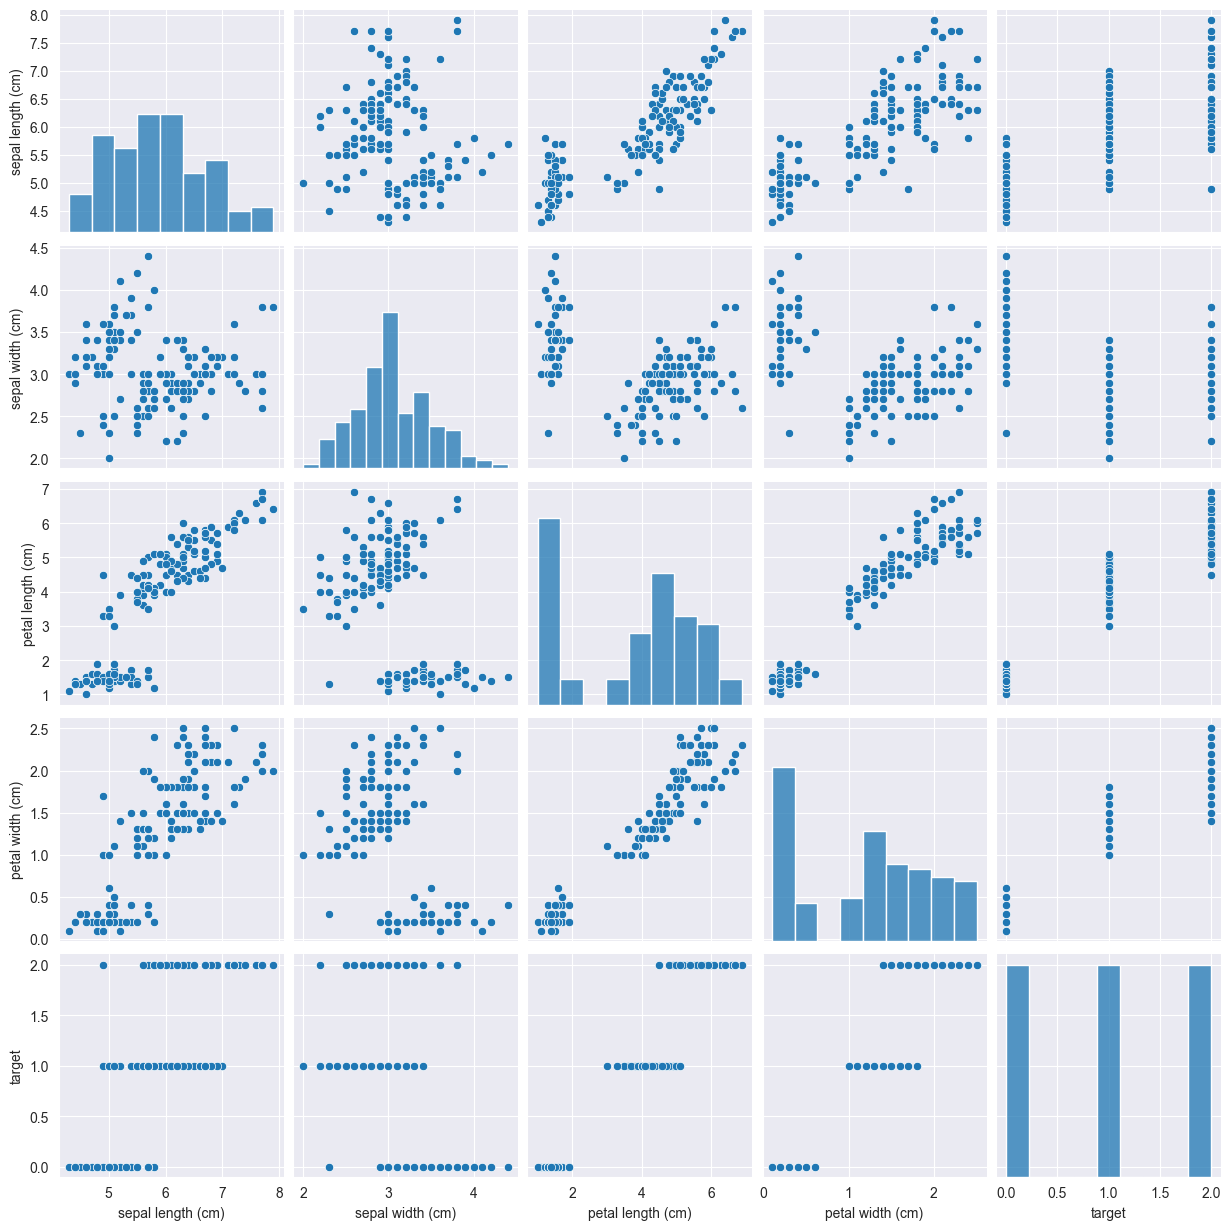

In [485]:
sns.pairplot(iris)

## The Correlation between columns

<Axes: >

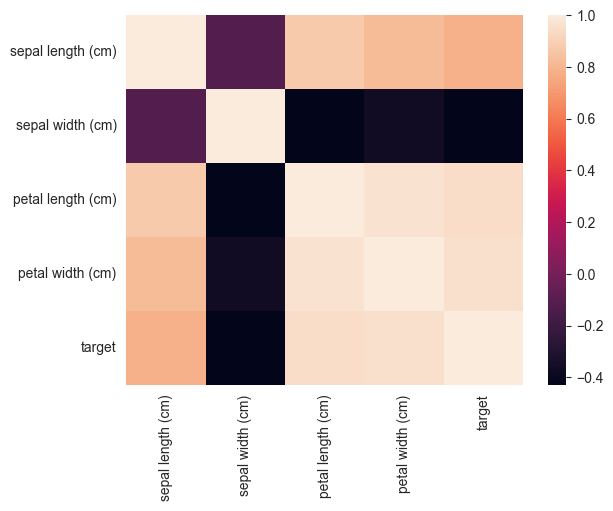

In [486]:
corr=iris.corr()
sns.heatmap(corr)

## Performing Standard Scaler

In [487]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)


## Split Data into Train and Test Data

In [488]:
train_x,test_x,train_y,test_y=train_test_split(x_scaled,y,test_size=0.3,random_state=42)

##  Instantiate the SVM model with different kernel functions and regularization parameters

In [489]:

param_grid = {
    'C': [0.1, 1, 10],
      # C --->regularization parameters which controls the trade-off between maximizing the margin and minimizing the classification error.
    'gamma': [0.1, 0.01, 0.001],
      # gamma ---> Kernel Parameter
    'kernel': ['linear', 'poly', 'rbf']
}
svm = SVC()



## Hyperparameter tuning using GridSearchCV

In [490]:

grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(train_x, train_y)
best_params = grid_search.best_params_


## Train the model with the best hyperparameters

In [491]:

best_svm = SVC(**best_params)
best_svm.fit(train_x, train_y)

SVC(C=10, gamma=0.1, kernel='linear')

## Testing and Evaluating the model

In [492]:

y_pred_SVM = best_svm.predict(test_x)
print("Best hyperparameters:", best_params)

# Compute Accuracy
accuracy_SVM = accuracy_score(test_y, y_pred_SVM)
print("Accuracy:", accuracy_SVM *100 , '%')

Best hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Accuracy: 97.77777777777777 %


## Print classification report

In [493]:

print(classification_report(test_y, y_pred_SVM))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



# <u>Artificial Neural Networks</u>

## Building the network using TensorFlow

The model consists of an input layer with 4 units corrseponding to our number of feautures, followed by two dense layers with sigmoid and ReLU activation functions, each containing 4 and 2 units respectively. The output layer has 3 unit with a sigmoid activation function, which is commonly used for  classification tasks. 

In [494]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid'),  
])


## Compiling the model 

In [495]:
model.compile(optimizer='Adam', loss='crossentropy', metrics=['accuracy'])

We train the NN using our training data for 500 epochs with a batch size of 32 and a validation split of 15% meaning that 15% of the training data will be used for validation of the model. This is stored in the history variable which prints the epochs.

In [496]:
history = model.fit(train_x, train_y, epochs = 500, batch_size = 32, validation_split = 0.15)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.3421 - loss: 1.1506 - val_accuracy: 0.3750 - val_loss: 1.1337
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3656 - loss: 1.1370 - val_accuracy: 0.3750 - val_loss: 1.1312
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3617 - loss: 1.1328 - val_accuracy: 0.3750 - val_loss: 1.1287
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3812 - loss: 1.1177 - val_accuracy: 0.3750 - val_loss: 1.1263
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3812 - loss: 1.1078 - val_accuracy: 0.3750 - val_loss: 1.1240
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3499 - loss: 1.1304 - val_accuracy: 0.3750 - val_loss: 1.1218
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3460 - loss: 1.1312 - val_accuracy: 0.3750 - val_loss: 1.1197
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3382 - loss: 1.1311 - val_accuracy: 0.3750 - val_loss:

## Test our Model

In [497]:
predictions = model.predict(test_x)
predictions

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[0.38731226, 0.42665747, 0.25575927],
       [0.5908303 , 0.35379785, 0.00361718],
       [0.3015529 , 0.4616144 , 0.7373579 ],
       [0.36433792, 0.43558317, 0.3708692 ],
       [0.33441636, 0.44764733, 0.54908216],
       [0.59377193, 0.35276383, 0.0033832 ],
       [0.45573443, 0.40132788, 0.06807726],
       [0.3015529 , 0.4616144 , 0.7373579 ],
       [0.33546895, 0.4472133 , 0.54262924],
       [0.43577158, 0.40856245, 0.10234583],
       [0.3015529 , 0.4616144 , 0.7373579 ],
       [0.6041429 , 0.34910998, 0.00266896],
       [0.59872335, 0.3510211 , 0.00302189],
       [0.6033914 , 0.34937528, 0.00271543],
       [0.5988655 , 0.350971  , 0.00301208],
       [0.35067248, 0.44102523, 0.44998604],
       [0.3015529 , 0.4616144 , 0.7373579 ],
       [0.45153433, 0.4028415 , 0.0742439 ],
       [0.4015055 , 0.42126548, 0.19853145],
       [0.3015529 , 0.4616144 , 0.7373579 ],
       [0.6022538 , 0.34977663, 0.00278723],
       [0.320051  , 0.45364952, 0.6356329 ],
       [0.

## Evaluating Model

In [498]:
evaluation = model.evaluate(test_x, test_y)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8338 - loss: 0.5155 


## Plotting Loss Graph

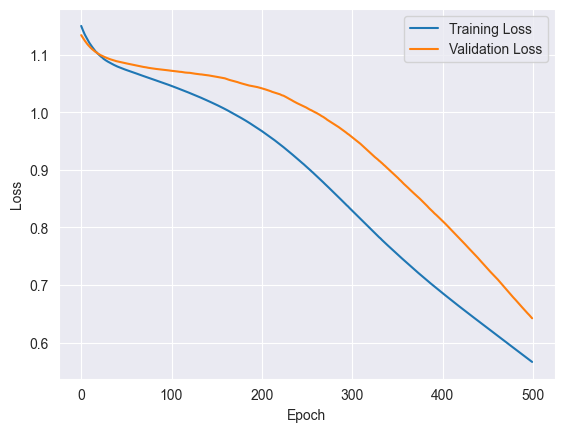

In [499]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()